# Pilot - Running Analysis

This Jupyter Notebook is to quickly test feasibility of the things I want to do with this project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import date
from butterworth_distance import get_distance, get_time
from scipy import stats
import seaborn as sns
sns.set()

In [3]:
running_df = pd.read_csv('GPSdata.csv', parse_dates=True, infer_datetime_format=True, encoding='utf-8')
running_df['datetime'] = pd.to_datetime(running_df['datetime']) # Redundancy to be 200% sure this works
# Timestamps are necessary to be able to do regressions
def to_timestamp(inputdatetime):
    return inputdatetime.timestamp()
running_df['timestamp'] = running_df['datetime'].apply(to_timestamp)


In [4]:
get_distance = np.vectorize(get_distance)
get_time = np.vectorize(get_time)
running_df['distance'] = get_distance(running_df['filename'])
running_df['duration'] = get_time(running_df['filename'])
running_df['avg_speed'] = running_df['distance'] / (running_df['duration']*60.0)

In [18]:
heat_threshold = 19.0

def isHot(data):
    if data >= heat_threshold:
        return 'Hot'
    return 'Cool'

isHot = np.vectorize(isHot)

#running_df['isHot'] = running_df['temperature'] >= heat_threshold
running_df['isHot'] = isHot(running_df['temperature'])
grouped = running_df.groupby('isHot')
hotdays = grouped.get_group('Hot').reset_index(drop=True)
nothotdays = grouped.get_group('Cool').reset_index(drop=True)

In [19]:
print(nothotdays.shape[0])
normaltest1 = stats.normaltest(hotdays['avg_speed']).pvalue
#normaltest2 = stats.normaltest(nothotdays['avg_speed']).pvalue
levene = stats.levene(hotdays['avg_speed'], nothotdays['avg_speed']).pvalue

#print(normaltest1, normaltest2, levene)
stats.mannwhitneyu(hotdays['avg_speed'], nothotdays['avg_speed']).pvalue

7


/Users/vasundhara/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


0.1985505729131255

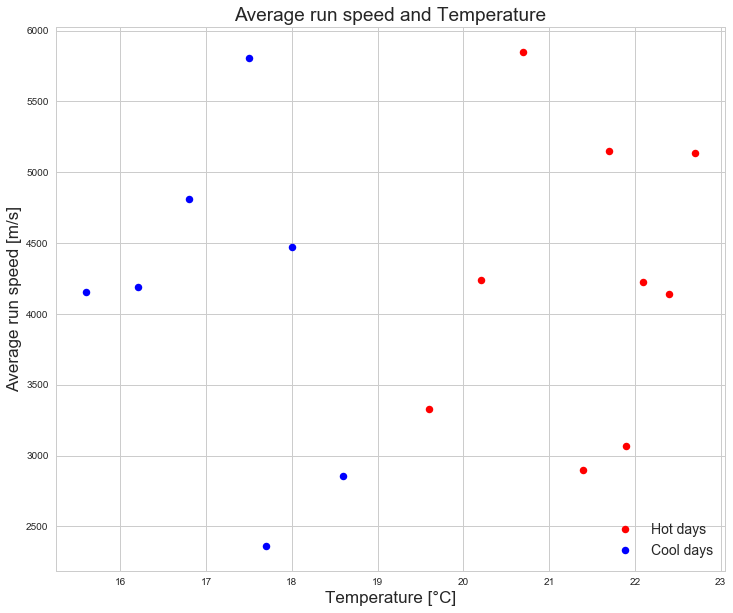

In [20]:
plt.figure(figsize=(12,10))
sns.set(style="whitegrid")
plt.plot(hotdays['temperature'], hotdays['distance'], 'r.', markersize=15, label='Hot days')
plt.plot(nothotdays['temperature'], nothotdays['distance'], 'b.', markersize=15, label='Cool days')
plt.xlabel('Temperature [°C]',fontsize=17)
plt.ylabel('Average run speed [m/s]',fontsize=17)
plt.title('Average run speed and Temperature',fontsize=19)
plt.legend(loc=4, fontsize=14)
plt.show()
#plt.savefig('distance_plot.png')

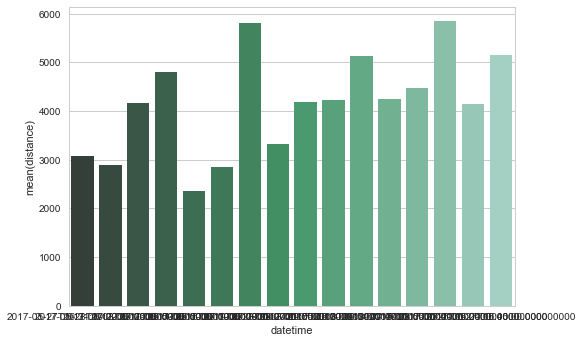

In [21]:
sns.barplot(running_df['datetime'], running_df['distance'], palette="BuGn_d")
plt.show()

In [22]:
running_df

,filename,datetime,temperature,humidity,timestamp,distance,duration,avg_speed,isHot
0,RK_gpx _2017-05-27_1631.gpx,2017-05-27 16:31:00,21.9,49.5,1.495928e+09,3070.311186,33.866667,1.510980,Hot
1,RK_gpx _2017-05-28_1722.gpx,2017-05-28 17:22:00,21.4,65.0,1.496017e+09,2895.684891,27.233333,1.772145,Hot
2,RK_gpx _2017-06-03_1726.gpx,2017-06-03 17:26:00,15.6,61.0,1.496536e+09,4157.226758,53.133333,1.304023,Cool
3,RK_gpx _2017-06-10_1653.gpx,2017-06-10 16:53:00,16.8,62.0,1.497139e+09,4810.786739,43.016667,1.863924,Cool
4,RK_gpx _2017-06-11_1650.gpx,2017-06-11 16:50:00,17.7,58.0,1.497225e+09,2362.111284,50.066667,0.786322,Cool
5,RK_gpx _2017-06-16_1719.gpx,2017-06-16 17:19:00,18.6,54.0,1.497659e+09,2853.050023,33.116667,1.435858,Cool
6,RK_gpx _2017-06-19_1708.gpx,2017-06-19 17:08:00,17.5,82.5,1.497917e+09,5810.101126,48.200000,2.009025,Cool
7,RK_gpx _2017-06-28_1827.gpx,2017-06-28 18:27:00,19.6,60.0,1.498700e+09,3327.773006,32.800000,1.690942,Hot
8,RK_gpx _2017-07-03_2055.gpx,2017-07-03 20:55:00,16.2,73.0,1.499140e+09,4191.688024,34.216667,2.041738,Cool
9,RK_gpx _2017-07-07_1620.gpx,2017-07-07 16:20:00,22.1,47.0,1.499470e+09,4225.817512,36.016667,1.955492,Hot
